<a href='http://www.scienceacademy.ca'> <img style="float: left;height:70px" src="Log_SA.jpeg"></a>

# Decision Tree and Random Forests Project -- Overview
### Mammographic Masses Dataset

Hi Guys,<br>

Welcome to the Decision Tree and Random Forests project Overview lecture. We are going to work with another real dataset on Mammography. The original dataset is avaiable at [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass).<br>

Mammography is the most effective method for breast cancer screening available today. However, the low positive predictive value of breast biopsy resulting from mammogram interpretation leads to approximately 70% unnecessary biopsies with benign outcomes. To reduce the high number of unnecessary breast biopsies, several computer-aided diagnosis (CAD) systems have been proposed in the last years. These systems help physicians in their decision to perform a breast biopsy on a suspicious lesion seen in a mammogram or to perform a short term follow-up examination instead. <br>

The dataset has the following 6 attributes including 1 target/goal attribute:
Attribute Information:

* BI-RADS assessment: 1 to 5 (ordinal, non-predictive!) 
* Age: patient's age in years (integer) 
* Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal) 
* Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal) 
* Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal) 
* Severity: benign=0 or malignant=1 (binominal, goal field!) -- we named it as Target in the cleaned version of the data set.

The csv file provied in the course material is a cleaner version of the original dataset, the dataset is treated with missing values. Althoug, you can download the original dataset and do some cleaning, however, it is recommended to use one which is provided in the course material. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the data file in df

**Read the csv data file and disply its head**

In [3]:
# Code here please
df = pd.read_csv('mammographic_masses_data_clean.csv')
df.head()

,BI-RADS,Age,Shape,Margin,Density,Target
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1


,BI-RADS,Age,Shape,Margin,Density,Target
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1


**How many data entries you have?**

In [4]:
# Code here please
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 6 columns):
BI-RADS    830 non-null int64
Age        830 non-null int64
Shape      830 non-null int64
Margin     830 non-null int64
Density    830 non-null int64
Target     830 non-null int64
dtypes: int64(6)
memory usage: 39.0 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 6 columns):
BI-RADS    830 non-null int64
Age        830 non-null int64
Shape      830 non-null int64
Margin     830 non-null int64
Density    830 non-null int64
Target     830 non-null int64
dtypes: int64(6)
memory usage: 39.0 KB


**Which type of cancer is common?**

In [11]:
# Code here please
df['Target'].value_counts()

0    427
1    403
Name: Target, dtype: int64

0    427
1    403
Name: Target, dtype: int64

**Reproduce the output to show some statistics**

In [12]:
# Code here please
df.describe()

,BI-RADS,Age,Shape,Margin,Density,Target
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


,BI-RADS,Age,Shape,Margin,Density,Target
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


**Reproduce the plot below**

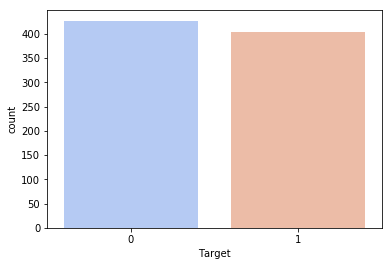

In [17]:
# Code here please
sns.countplot(data = df,x='Target',palette='coolwarm')

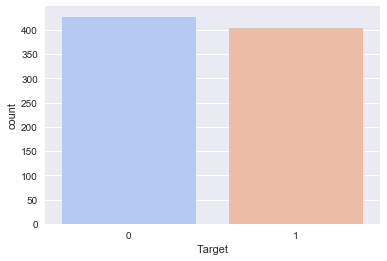

**Re-create the plot below**

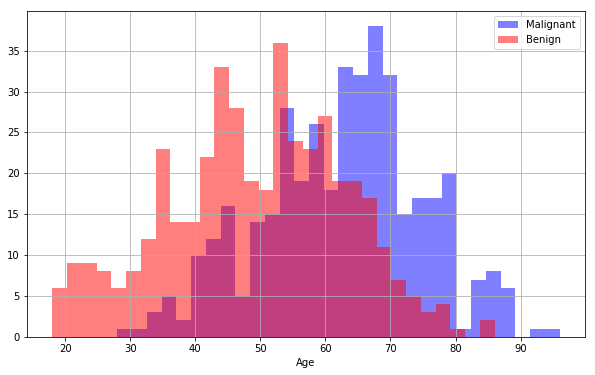

In [38]:
# Code here please
plt.figure(figsize=(10,6))
df[df['Target']==1]['Age'].hist(bins = 30, alpha=0.5,color ='blue', label='Malignant')
df[df['Target']==0]['Age'].hist(bins = 30, alpha = 0.5, color ='red', label ="Benign")
plt.xlabel('Age')
plt.legend()

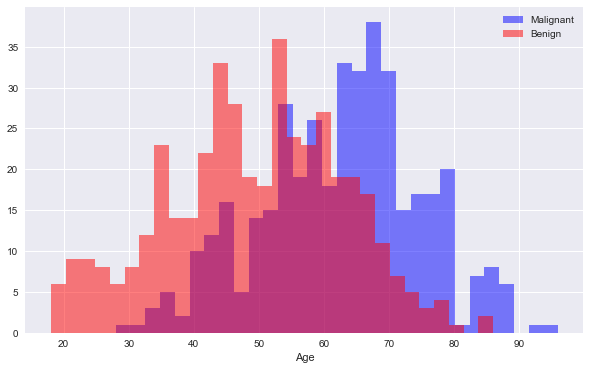

** Do the Train Test Split** using test size 0.3 and random states default value.

In [56]:
# Code here please
from sklearn.model_selection import train_test_split

In [57]:
# Code here please
X= df.drop('Target',axis =1)
y = df['Target']

In [58]:
# Code here please
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Decision Tree
**Importing decision tree classifier and create its instance**

In [65]:
# Code here please
from sklearn.tree import DecisionTreeClassifier
dTree= DecisionTreeClassifier()

**Fit the training data to the model**

In [66]:
# Code here please
dTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

**Do the predistions for your test data and print the results as given below**

In [67]:
# Code here please
from sklearn.metrics import classification_report,confusion_matrix

In [68]:
# Code here please
y_pred = dTree.predict(X_test)

In [69]:
# Code here please
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.74      0.78      0.76       127
          1       0.76      0.72      0.74       122

avg / total       0.75      0.75      0.75       249

[[99 28]
 [34 88]]


             precision    recall  f1-score   support

          0       0.73      0.79      0.76       133
          1       0.73      0.66      0.70       116

avg / total       0.73      0.73      0.73       249

[[105  28]
 [ 39  77]]


### Random Forests
**Import Random Forest Classifier and create its instance with 200 no of trees **

In [71]:
# Code here please
from sklearn.ensemble import RandomForestClassifier
rForest = RandomForestClassifier(n_estimators=200)

**Fit your training data to Random Forests instance**

In [72]:
# Code here please
rForest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

**Do the predictions and print results as given belwo**

In [73]:
# Code here please
y_pred2= rForest.predict(X_test)

In [74]:
# Code here please
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

             precision    recall  f1-score   support

          0       0.81      0.76      0.79       127
          1       0.77      0.81      0.79       122

avg / total       0.79      0.79      0.79       249

[[97 30]
 [23 99]]


             precision    recall  f1-score   support

          0       0.79      0.83      0.81       133
          1       0.80      0.74      0.77       116

avg / total       0.79      0.79      0.79       249

[[111  22]
 [ 30  86]]


***Which model is better? ***
# Excellent work! 